In [39]:
# ---------------------- IMPORT LIBRARIES --------------------------
import os 
import sys 
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report,accuracy_score, roc_curve

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
# --------------------- HANDLING DIRECTORY -------------------------

# parent folder director
parent_dir = Path.cwd().parent

# data directory
data_dir = parent_dir / "data"

# dataset directory
dataset_dir = data_dir / "Loan_Default.csv"

# Add parent directory to system
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

In [4]:
# ------- IMPORT PREPROCESSING FUNC ---------

from modules.preprocess_2 import load_and_split_data
from modules.preprocess_2 import get_preprocessing_pipeline
from modules.preprocess_2 import transform_data
from modules.preprocess_2 import get_transformed_df

In [5]:
#----------- LOAD AND SPLIT DATA -----------------
X_train, X_test, y_train, y_test = load_and_split_data()

In [6]:
# --------------------- Transformed DataFrames ----------------------

df = get_transformed_df()

df.head()

,loan_amount,income,Upfront_charges,Interest_rate_spread,dtir1,LTV,age_numerical,loan_limit_ncf,Gender_Joint,Gender_Male,...,term_322.0,term_324.0,term_336.0,term_348.0,term_360.0,Credit_Score_Group_Fair,Credit_Score_Group_Good,Credit_Score_Group_Poor,Credit_Score_Group_Very Good,Status
141039,-0.555165,0.182800,-0.039564,-2.430172,-3.792472,-2.536675,1.370689,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
121276,0.863453,-0.036221,-0.487360,-0.345545,0.905928,-0.163195,-0.082704,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
11214,0.242313,-0.645258,0.375590,0.080035,1.257591,-1.484969,0.643992,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
129659,-0.177727,0.837130,0.492038,1.096457,0.213504,0.908243,0.643992,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13370,-0.929951,-0.916299,0.588151,-0.103990,1.086738,0.201294,1.370689,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [7]:
# ---------- PREPROCESSING PIPELINE --------------------
preprocessing = get_preprocessing_pipeline()

preprocessing

Pipeline(steps=[('data_cleaning',
                 FunctionTransformer(func=<function clean_data at 0x0000019DBA7A6FC0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['loan_amount', 'income',
                                                   'Upfront_charges...
                                                   'approv_in_adv', 'loan_type',
                                                   'loan_purpose',
                                                   'Credit_Worthiness',
                                                   'open_credit',
                                                   'Neg_ammortization',
                                                   'interest_only',
                                                   'lump_sum_payment',
                                                   'construction_type',
                                                   'occupancy_type',
                                                   'Secured_by', 'total_units',
                                                   'credit_type',
                                                   'co-applicant_credit_type',
                                                   'submission_of_application',
                                                   'Region', 'Security_Type',
                                                   'term',
                                                   'Credit_Score_Group'])])),
                ('final_imputer', SimpleImputer(strategy='median'))])

## BASELINE RANDOM FOREST CLASSIFIER

In [9]:
# -------------------- RANDOM FOREST MODEL ----------------------

rf_baseline = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,
    min_samples_split=5, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced'
)

In [10]:
# ---------------- Model Pipeline ----------------------
rf_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessing), 
        ('model', rf_baseline)
    ]
)

rf_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_cleaning',
                                  FunctionTransformer(func=<function clean_data at 0x0000019DBA7A6FC0>)),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('log_num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('log_transform',
                                                                                    FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                   ('scalar',
                                                                                    StandardScaler())]),
                                                                   ['loan_a...
                                                                    'construction_type',
                                                                    'occupancy_type',
                                                                    'Secured_by',
                                                                    'total_units',
                                                                    'credit_type',
                                                                    'co-applicant_credit_type',
                                                                    'submission_of_application',
                                                                    'Region',
                                                                    'Security_Type',
                                                                    'term',
                                                                    'Credit_Score_Group'])])),
                                 ('final_imputer',
                                  SimpleImputer(strategy='median'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=5, n_jobs=-1,
                                        random_state=42))])

In [ ]:
# ------------------ ACCURACY CROSS-VALIDATION ----------------------

cross_val_score(
    rf_pipeline, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='accuracy'
)

array([0.99983185, 0.99995796, 0.99995796, 0.99995796, 0.99987388])

In [12]:
# ------------------ ROC AUC CROSS-VALIDATION ----------------------

cross_val_score(
    rf_pipeline, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='roc_auc',
)

array([1.        , 1.        , 1.        , 1.        , 0.99997255])

In [14]:
# ------------------- CROSS-VALIDATED PREDICTIONS --------------------

y_predict = cross_val_predict(
    rf_pipeline,
    X_train,
    y_train,
    cv=5
)

In [23]:
# ------------------- CROSS-VALIDATED PROBABILITY PREDICTIONS --------------------

y_predict_proba = cross_val_predict(
    rf_pipeline,
    X_train,
    y_train,
    cv=5,
    method='predict_proba'
)[:, 1]

y_predict_proba[:5]

array([0.12539319, 0.05735758, 0.83625078, 0.0742731 , 0.16846965])

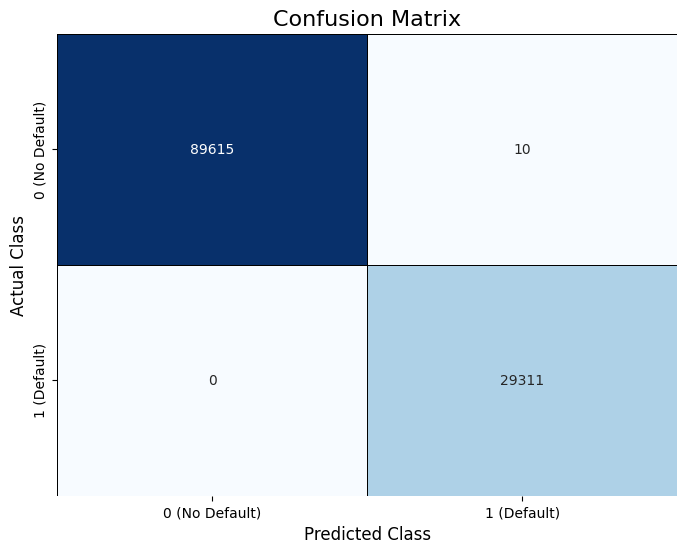

In [20]:
# confusion matrix
cm = confusion_matrix(y_train, y_predict)

class_labels = ['0 (No Default)', '1 (Default)']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="0", 
    cmap='Blues', 
    xticklabels=class_labels, 
    yticklabels=class_labels,
    cbar=False,
    linewidths=0.5,
    linecolor='black'
)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [21]:
# ----------------- CLASSIFICATION REPORT ----------------------
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89625
           1       1.00      1.00      1.00     29311

    accuracy                           1.00    118936
   macro avg       1.00      1.00      1.00    118936
weighted avg       1.00      1.00      1.00    118936



In [24]:
# ----------------- ROC PLOT ----------------------

# Since the model uses class_weight='balanced', the default threshold of 0.5 is usually fine.
y_predict_cv = (y_predict_proba >= 0.5).astype(int)

print("--- Cross-Validated Classification Report (Training Set) ---")
print(classification_report(y_train, y_predict_cv, digits=4))

--- Cross-Validated Classification Report (Training Set) ---
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999     89625
           1     0.9997    1.0000    0.9998     29311

    accuracy                         0.9999    118936
   macro avg     0.9998    0.9999    0.9999    118936
weighted avg     0.9999    0.9999    0.9999    118936



In [25]:
# Calculate Cross-Validated AUC
cv_auc = roc_auc_score(y_train, y_predict_proba)
print(f"\nCross-Validated Training Set AUC Score: {cv_auc:.4f}")


Cross-Validated Training Set AUC Score: 1.0000


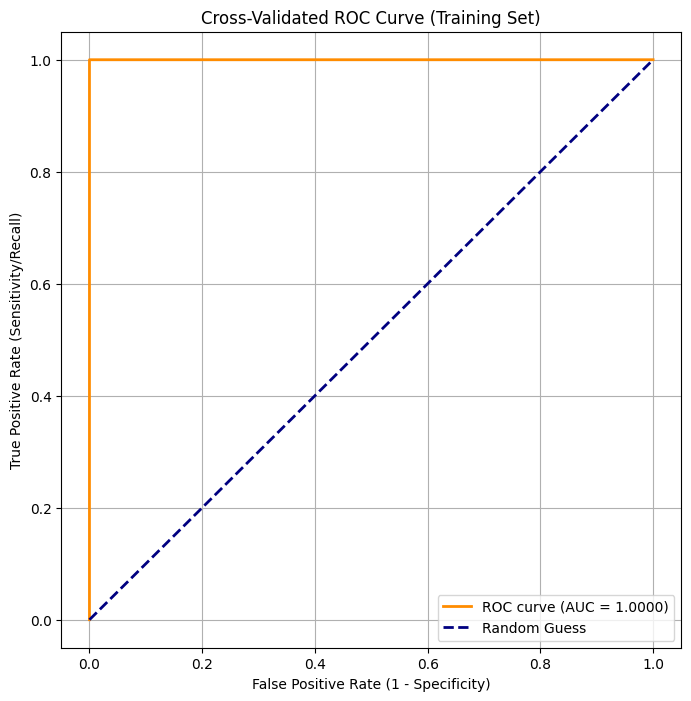

In [28]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, y_predict_proba)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {cv_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Cross-Validated ROC Curve (Training Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## HYPERPARAMETER TUNNING

In [35]:
# ---------------- RANDOM FOREST INSTANTIATE--------------------

# Random Forest Classifier with balanced class weights
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('classifier', rf_classifier)
])

rf_pipeline


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_cleaning',
                                  FunctionTransformer(func=<function clean_data at 0x0000019DBA7A6FC0>)),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('log_num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('log_transform',
                                                                                    FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                   ('scalar',
                                                                                    StandardScaler())]),
                                                                   ['loan_a...
                                                                    'interest_only',
                                                                    'lump_sum_payment',
                                                                    'construction_type',
                                                                    'occupancy_type',
                                                                    'Secured_by',
                                                                    'total_units',
                                                                    'credit_type',
                                                                    'co-applicant_credit_type',
                                                                    'submission_of_application',
                                                                    'Region',
                                                                    'Security_Type',
                                                                    'term',
                                                                    'Credit_Score_Group'])])),
                                 ('final_imputer',
                                  SimpleImputer(strategy='median'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [36]:
# ------------------- HYPERPARAMETER GRID DEFINITION --------------------

# Define a simpler grid to prevent immediate perfect fitting
param_grid = {
    'classifier__n_estimators': [100], 
    
    # Deep trees overfit; shallow trees generalize better.
    'classifier__max_depth': [5, 10, 15], 
    
    # Higher values constrain the model.
    'classifier__min_samples_split': [5, 10], 
    
    # Minimum number of samples required to be at a leaf node.
    'classifier__min_samples_leaf': [3, 5]
}

In [37]:
# ---------- GRID SEARCH --------

grid_search = GridSearchCV(
    rf_pipeline, 
    param_grid, 
    cv=3, 
    scoring='roc_auc', 
    n_jobs=-1,
    verbose=2
)

In [38]:
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search Complete.")

# Extract the best estimator
best_rf_pipeline = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best CV ROC AUC score: {grid_search.best_score_:.4f}")

Starting Grid Search...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid Search Complete.
Best parameters found: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best CV ROC AUC score: 1.0000


In [ ]:
# --------- SAVE THE BEST MODEL ---------
filepath = data_dir / 'best_rf_pipeline.pkl'

joblib.dump(best_rf_pipeline, filepath)

['c:\\Users\\user\\Desktop\\Loan Default Prediction\\data\\best_rf_pipeline.pkl']

In [41]:
# ------------------- RE-EVALUATE WITH BEST MODEL --------------------

# Now, use the best, constrained model for cross-validated prediction
y_pred_proba_tuned = cross_val_predict(
    best_rf_pipeline,
    X_train,
    y_train,
    cv=5,
    method='predict_proba'
)[:, 1]

# Convert probabilities to hard labels (using default 0.5 threshold)
y_predict_tuned = (y_pred_proba_tuned >= 0.5).astype(int)

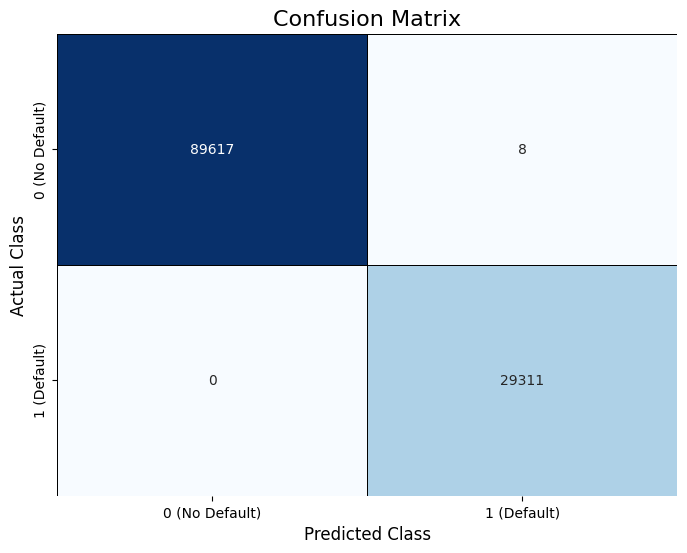

In [44]:
# ------------- CONFUSION MATRIX ------------

cm_tuned = confusion_matrix(y_train, y_predict_tuned)

# confusion matrix
cm = confusion_matrix(y_train, y_predict)

class_labels = ['0 (No Default)', '1 (Default)']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_tuned, 
    annot=True, 
    fmt="0", 
    cmap='Blues', 
    xticklabels=class_labels, 
    yticklabels=class_labels,
    cbar=False,
    linewidths=0.5,
    linecolor='black'
)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [42]:
print("\n--- Cross-Validated Classification Report (TUNED MODEL) ---")
print(classification_report(y_train, y_predict_tuned, digits=4))


cv_auc_tuned = roc_auc_score(y_train, y_pred_proba_tuned)
print(f"\nCross-Validated Training Set AUC Score (TUNED): {cv_auc_tuned:.4f}")


--- Cross-Validated Classification Report (TUNED MODEL) ---
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000     89625
           1     0.9997    1.0000    0.9999     29311

    accuracy                         0.9999    118936
   macro avg     0.9999    1.0000    0.9999    118936
weighted avg     0.9999    0.9999    0.9999    118936


Cross-Validated Training Set AUC Score (TUNED): 1.0000


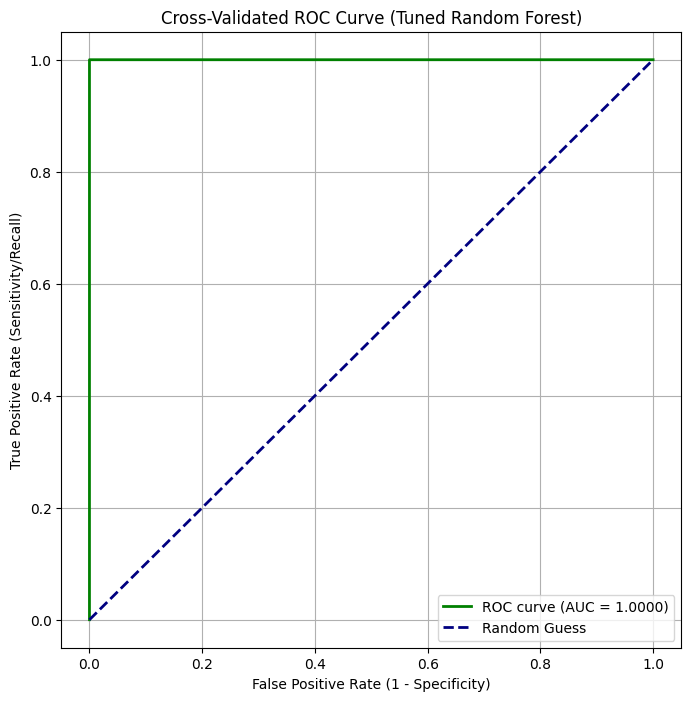

In [43]:
# Plotting the new, hopefully more realistic, ROC curve
fpr_tuned, tpr_tuned, _ = roc_curve(y_train, y_pred_proba_tuned)

plt.figure(figsize=(8, 8))
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'ROC curve (AUC = {cv_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Cross-Validated ROC Curve (Tuned Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## FEATURE IMPORTANCE

In [ ]:
# -------------- FEATURE IMPORTANCE --------------

# Extract feature importances from the best model
best_model = best_rf_pipeline.named_steps['classifier']

# drop target column for feature importance analysis
df.drop(columns = 'Status', inplace=True)



KeyError: "['Status'] not found in axis"

Text(0.5, 1.0, 'Top 10 Feature Importances from Tuned Random Forest')

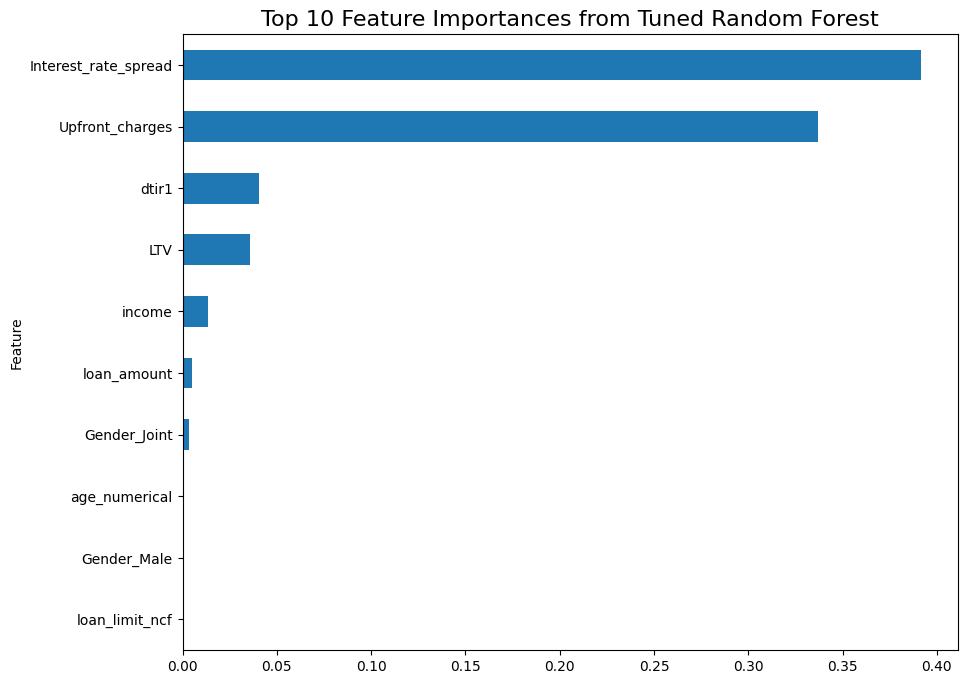

In [60]:
# feature importances
important_feat = best_model.feature_importances_

# Create a DataFrame for better visualization
df_imp = pd.DataFrame({
    'Feature': df.columns,
    'Importance': important_feat
})

# Sort features by importance
(
    df_imp.head(10).sort_values(by='Importance', ascending=True)
    .plot(
        kind='barh', 
        x='Feature', 
        y='Importance', 
        figsize=(10, 8), 
        legend=False
    )
)
plt.title('Top 10 Feature Importances from Tuned Random Forest', fontsize=16)